# Modellazione bayesiana {#sec-bayes-workflow}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import scipy.stats as stats
from scipy.stats import beta
from scipy.special import factorial
from scipy.special import comb
from scipy.integrate import quad

In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = 'retina'

## Introduzione {.unnumbered}

L'obiettivo di questo Capitolo è di introdurre il quadro concettuale dela modellizzazione bayesiana.

## Inferenza Statistica

L'inferenza statistica si configura come un processo che integra deduzione e induzione, finalizzato all'esame di dati campionari per dedurre le proprietà di una popolazione più ampia. Immaginiamo di analizzare l'altezza di cinque soggetti selezionati casualmente. Un meccanismo sottostante, che chiameremo "processo T", governa la determinazione delle loro altezze. Comprendere o stimare questo processo è l'obiettivo dell'inferenza statistica. La natura di T è spesso avvolta nel mistero, oscurata dalla variabilità dei dati che osserviamo. Questa variabilità può essere scissa in due grandi cause: la variabilità intrinseca del fenomeno sotto osservazione (come differenze genetiche o ambientali) e le limitazioni delle nostre capacità di osservazione e analisi.

@McElreath_rethinking nel suo lavoro "Statistical Rethinking" introduce il concetto di "Grande Mondo", che rappresenta l'infinità di processi possibili che potrebbero spiegare le nostre osservazioni. Di fronte a questa infinità, effettuare inferenze dirette su tutte le possibili proprietà del Grande Mondo si rivela impraticabile. Ci orientiamo quindi verso il "Piccolo Mondo", una rappresentazione semplificata che considera un insieme finito di modelli e parametri ritenuti rilevanti per il nostro studio. Per esempio, nell'analisi dell'altezza, potremmo proporre un modello probabilistico in cui l'altezza segue una distribuzione normale, caratterizzata da una media (µ) e una deviazione standard (σ), con l'intento di stimare questi parametri ignoti.

La collezione di distribuzioni di probabilità derivante dalla variazione dei parametri del modello nel Piccolo Mondo costituisce la funzione di verosimiglianza. Questo insieme, tuttavia, è spesso troppo ampio per essere gestito con facilità. La nostra conoscenza pregressa o le nostre convinzioni riguardo al fenomeno in esame ci assistono nel restringere le possibilità.

Nell'inferenza bayesiana, queste convinzioni iniziali vengono espresse tramite una densità di probabilità a priori, che attribuisce un peso ai possibili parametri del modello in base alle nostre convinzioni iniziali. La regola di Bayes sta al cuore dell'inferenza bayesiana, permettendoci di aggiornare queste convinzioni alla luce dei nuovi dati osservati. Attraverso questo processo, otteniamo la probabilità a posteriori dei parametri, che fornisce una stima più accurata del processo generativo dei dati, T.

L'inferenza statistica, dunque, ci avvicina alla comprensione di fenomeni complessi attraverso la modellazione delle osservazioni via processi semplificati nel "Piccolo Mondo". Grazie all'inferenza bayesiana, che integra le conoscenze pregresse ai nuovi dati, perfezioniamo le nostre stime per una comprensione più profonda del vero processo sottostante.

La nota affermazione di @boxallmodels 

> Tutti i modelli sono sbagliati, ma alcuni sono utili

cattura l'essenza dell'inferenza statistica. Non miriamo a un "modello perfetto" che rifletta ogni dettaglio del "Grande Mondo", bensì a individuare modelli del "Piccolo Mondo" che siano efficaci nel fare previsioni sul fenomeno studiato.

Attraverso la statistica, disponiamo degli strumenti per costruire, valutare e selezionare modelli basati sull'inferenza bayesiana, che ci consentono di aggiornare e rifinire i nostri modelli in risposta a nuove informazioni. Questo processo ci guida verso modelli "utili", che, seppur non perfetti, ci permettono di fare previsioni accurate e di approfondire la nostra comprensione del fenomeno di interesse.

### I Metodi Bayesiani in Psicologia

Nell'ambito dell'inferenza statistica, i metodi bayesiani hanno guadagnato sempre popolarità anche in psicologia, dove l'adozione di approcci bayesiani ha visto una crescita esponenziale, grazie anche alla disponibilità di risorse educative e pubblicazioni specializzate. In particolare, diversi testi di rilievo hanno contribuito in modo significativo a fornire agli studiosi gli strumenti necessari per applicare con successo l'inferenza bayesiana all'analisi dei dati psicologici. Tra questi testi spiccano opere come quelle di @albert_2019prob, @Johnson2022bayesrules, @McElreath_rethinking e @doingbayesian, che hanno svolto un ruolo fondamentale nel facilitare l'integrazione dei metodi bayesiani nella pratica analitica della psicologia.

### Approccio Bayesiano alla Statistica

L'approccio bayesiano alla statistica si distingue non solo per l'uso del Teorema di Bayes, ma anche per il suo modo di gestire l'incertezza e di valutare l'intero spettro di possibili esiti attraverso le distribuzioni di probabilità. Questo approccio rifiuta l'adozione acritica di stime puntuali, favorendo invece una visione probabilistica che accoglie una vasta gamma di esiti, rimanendo fedele alla concezione bayesiana della probabilità.

### Elementi Fondamentali della Modellazione Statistica Bayesiana

I fondamenti della modellazione statistica bayesiana includono variabili casuali, distribuzioni di probabilità priori e posteriori, e il processo di aggiornamento bayesiano.

- **Variabili casuali** rappresentano elementi chiave nella modellazione bayesiana, consentendoci di esprimere e quantificare relazioni probabilistiche.
- **Distribuzioni di probabilità** sono strumenti cruciali per rappresentare quantitativamente l'incertezza e le conoscenze pregresse. Le distribuzioni priori esprimono le nostre convinzioni iniziali, mentre le distribuzioni posteriori risultano dall'integrazione delle nuove evidenze.
- **L'aggiornamento bayesiano** è il meccanismo che affina le distribuzioni priori alla luce di nuovi dati, riducendo l'incertezza e migliorando le stime dei parametri.

La modellazione bayesiana segue un approccio metodologico strutturato in progettazione del modello, applicazione del teorema di Bayes, e valutazione critica del modello. Questo flusso di lavoro bayesiano [@baribault2023troubleshooting] costituisce un ciclo di apprendimento e affinamento continuo, che esploreremo nei capitoli successivi per una comprensione approfondita del processo.

## Riesame del Teorema di Bayes

Prima di approfondire il flusso di lavoro bayesiano, è opportuno rivisitare il teorema di Bayes. Quando ci riferiamo ad eventi osservabili discreti, possiamo esprimere la regola nel modo seguente:

$$ P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)} $$

Dato un vettore di dati $y$, il teorema di Bayes ci permette di calcolare le distribuzioni posteriori dei parametri di interesse, che possiamo rappresentare con il vettore dei parametri $\theta$. Questo calcolo si realizza riformulando la formula precedente come quella scritta di seguito. La differenza qui consiste nel fatto che il teorema di Bayes è scritto in termini di distribuzioni di probabilità. In questo contesto, $p(\cdot)$ rappresenta una funzione di densità di probabilità (nel caso continuo) o una funzione di massa di probabilità (nel caso discreto).

$$ p(\theta \mid y) = \frac{p(y \mid \theta) \times p(\theta)}{p(y)} $$

La suddetta affermazione può essere riscritta in parole nel modo seguente:

$$
\text{Posteriore} = \frac{\text{Verosimiglianza × A Priori}}{\text{Verosimiglianza Marginale}}  
$$

I termini qui presentati hanno il seguente significato.

- Il Posteriore, $p(\theta \mid y)$, è la distribuzione di probabilità dei parametri condizionata ai dati.
- La Verosimiglianza, $p(y \mid \theta)$, come descritto nel capitolo {ref}`notebook-likelihood`, è la PMF (nel caso discreto) o la PDF (nel caso continuo) espressa come funzione di $\theta$.
- L'A Priori, $p(\theta)$, è la distribuzione di probabilità iniziale dei parametri, prima di osservare i dati.
- La Verosimiglianza Marginale, $p(y)$ standardizza la distribuzione posteriore per garantire che l'area sotto la curva della distribuzione sommi a 1, ossia, si assicura che il posteriore sia una distribuzione di probabilità valida.

Nell'ambito bayesiano, si utilizzano le distribuzioni posteriori aggiornate dei parametri per l'inferenza, ad esempio per calcolare la probabilità che un parametro si trovi entro un determinato intervallo.

Le distribuzioni a priori, indicate con $p(\theta)$, sono basate su risultati precedenti, o possono assumere la forma di "distribuzioni di regolarizzazione" non informative. Un vantaggio significativo delle distribuzioni a priori emerge quando si lavora con campioni di dati di piccole dimensioni; in tali contesti, le distribuzioni a priori di regolarizzazione possono esercitare un effetto moderatore, attenuando le fluttuazioni causate dalla limitata numerosità del campione.

Nel definire il processo di modellazione, consideriamo una variabile casuale $Y$, con un valore osservato $y$. Ad esempio, il punteggio ottenuto da uno studente in un test di psicometria può essere modellato come $Y$, che assume uno specifico valore $y$ una volta osservato il punteggio. Per spiegare come i dati osservati $y$ siano generati, specificiamo un modello di probabilità, il cosiddetto *processo generatore di dati* (DGP).

Il parametro $\theta$ caratterizza il modello di probabilità di interesse, potendo essere uno scalare (come media o varianza) o un vettore (ad esempio, coefficienti di regressione). L'obiettivo dell'inferenza statistica è stimare questi parametri sconosciuti a partire dai dati. A differenza dell'inferenza frequentista, che considera $\theta$ come fisso ma sconosciuto, l'inferenza bayesiana tratta $\theta$ come una variabile casuale soggetta a una distribuzione di probabilità a priori.

In questo contesto, la probabilità congiunta di parametri e dati si calcola come funzione della distribuzione condizionale dei dati dati i parametri e della distribuzione a priori dei parametri. La distribuzione posteriore di $\theta$ dato $y$ si deriva moltiplicando la funzione di verosimiglianza dei dati $p(y \mid \theta)$ per la distribuzione a priori $p(\theta)$, e normalizzando per $p(y)$. Nei modelli complessi con numerosi parametri, l'elaborazione della distribuzione posteriore può richiedere tecniche computazionali avanzate.

## Costruzione del Modello dell'Aggiornamento Bayesiano 

Per spiegare il concetto di aggiornamento bayesiano in maniera intuitiva, @McElreath_rethinking propone il seguente esempio. Supponiamo di avere un mappamondo e di volere stimare qual è la proporzione coperta d'acqua del globo. Per stimare questa proporzione eseguiamo il seguente esperimento casuale: lanciamo in aria il mappamondo e poi lo afferriamo quando cade. Registriamo se la superficie sotto il nostro indice destro è terra o acqua. Ripetiamo questa procedura un certo numero di volte e calcoliamo la proporzione di volte in cui abbiamo osservato "acqua". In ogni lancio, ogni valore della proporzione sconosciuta $p$ può essere più o meno plausibile, date le evidenze fornite dai lanci precedenti.

Un modello bayesiano inizia assegnando un insieme di plausibilità iniziali a ciascuno dei possibili valori $p$, dette plausibilità priori. Poi, queste plausibilità vengono aggiornate alla luce dei dati raccolti, producendo le plausibilità posteriori. Questo processo di aggiornamento è una forma di apprendimento, conosciuto come aggiornamento bayesiano.

Nell'esempio di @McElreath_rethinking, supponiamo che il nostro modello bayesiano assegni inizialmente la stessa plausibilità a ogni possibile valore di $p$ (proporzione di acqua). Ora, osserviamo il primo grafico in alto a sinistra nella figura generata dallo script. La linea tratteggiata orizzontale rappresenta la plausibilità iniziale di ciascun possibile valore di $p$. Dopo aver visto il primo lancio, che risulta in “W” (acqua), il modello aggiorna le plausibilità alla linea continua. La plausibilità che $p$ = 0 scende a zero, indicando che è "impossibile" non avere acqua, dato che abbiamo osservato almeno una traccia di acqua sul globo. Allo stesso modo, la plausibilità che $p$ > 0.5 aumenta, poiché non c'è ancora evidenza di terra sul globo, quindi le plausibilità iniziali vengono modificate per essere coerenti con questa osservazione. Tuttavia, le differenze nelle plausibilità non sono ancora molto grandi, poiché le evidenze raccolte finora sono limitate. In questo modo, la quantità di evidenza vista finora si riflette nelle plausibilità di ciascun valore di $p$: la plausibilità che $p$ sia 0 è zero e la plausibilità che $p$ sia 1 è massima. Quindi, la distribuzione a posteriori di $p$ è rappresentata dalla linea continua che collega questi due estremi.

Nei grafici successivi, vengono introdotti ulteriori campioni dal globo, uno alla volta. Ogni curva tratteggiata rappresenta la curva continua dal grafico precedente, spostandosi da sinistra a destra e dall'alto in basso. La seconda osservazione è "terra" (L). La distribuzione a priori è la linea tratteggiata del secondo pannello e la distribuzione a postriori è la linea curva. Otteniamo questa curva perché assegniamo una verosimiglianza 0 agli eventi $p$ = 0 (abbiamo osservato "acqua") e $p$ = 1 (abbiamo osservato "terra"). In due lanci abbiamo osservato una volta "terra" e una volta "acqua". Dunque la plausibilità che $p$ = 0.5 è massima. Da cui la curva che abbiamo disegnato. 

Il terzo lancio del mappamondo produce nuovamente "acqua". Quindi a questo punto il valore più plausibile di $p$ è 0.75. modifichiamo dunque la distribuzione a priori (linea tratteggiata nel terzo pannello) in modo da rappresentare le nostre nuove conoscenze, come indicato dalla linea continua.

Ogni volta che viene osservato un "W", il picco della curva di plausibilità si sposta a destra, verso valori maggiori di $p$. Ogni volta che viene osservato un "L" (terra), si sposta nella direzione opposta. L'altezza massima della curva aumenta con ogni campione, significando che la plausibilità complessiva (1) viene ridistribuita ad un numero minore di valori di $p$ i quali accumulano una maggiore plausibilità man mano che aumenta la quantità di evidenza. Con l'aggiunta di ogni nuova osservazione, la curva viene aggiornata in modo coerente con tutte le osservazioni precedenti.

È importante notare che ogni set aggiornato di plausibilità diventa la plausibilità iniziale per l'osservazione successiva. Ogni conclusione è il punto di partenza per l'inferenza futura. Questo processo di aggiornamento funziona anche al contrario: conoscendo l'ultimo set di plausibilità e l'ultima osservazione, è possibile matematicamente dedurre la curva di plausibilità precedente. I dati potrebbero essere presentati al modello in qualsiasi ordine, o anche tutti insieme. Nella maggior parte dei casi, i dati verranno considerati tutti insieme per comodità, ma è importante capire che ciò rappresenta solo l'abbreviazione di un processo di apprendimento iterato.

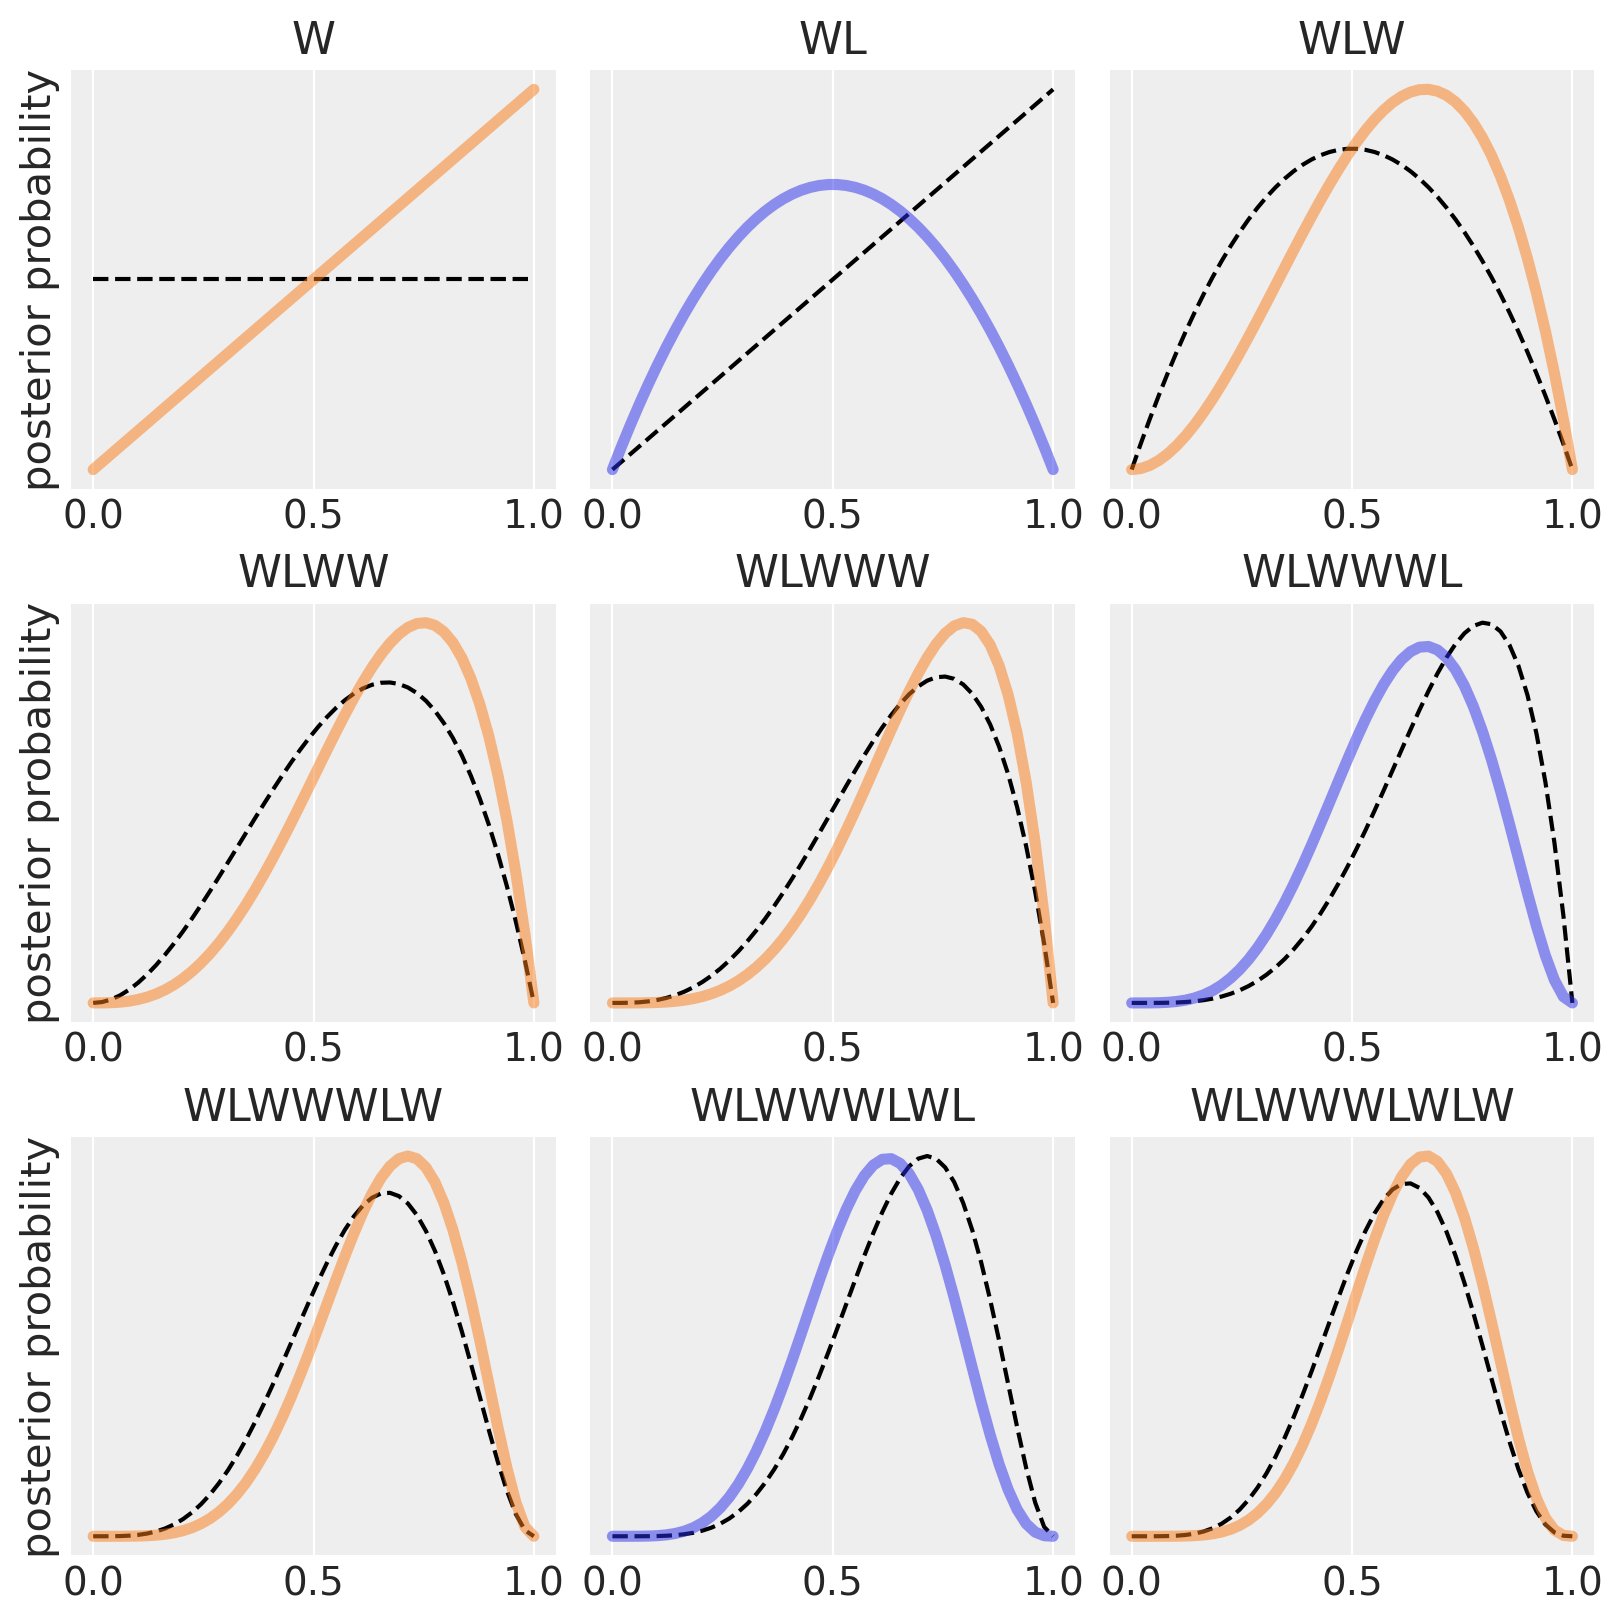

In [3]:
def beta(W, L, p):
    return factorial(W + L + 1) / (factorial(W) * factorial(L)) * p ** W * (1-p) ** L


def plot_beta_from_observations(observations: str, resolution: int = 50, **plot_kwargs):
    """Calcualte the posterior for a string of observations"""
    n_W = len(observations.replace("L", ""))
    n_L = len(observations) - n_W
    proportions = np.linspace(0, 1, resolution)
        
    probs = beta(n_W, n_L, proportions)
    plt.plot(proportions, probs, **plot_kwargs)
    plt.yticks([])
    plt.title(observations)
    

# Tossing the globe
observations = "WLWWWLWLW"
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for ii in range(9):
    ax = axs[ii // 3][ii % 3]
    plt.sca(ax)
    # Plot previous
    if ii > 0:
        plot_beta_from_observations(observations[:ii], color='k', linestyle='--')
    else:
        # First observation, no previous data
        plot_beta_from_observations('', color='k', linestyle='--')
        
    color = 'C1' if observations[ii] == 'W' else 'C0'
    plot_beta_from_observations(observations[:ii+1], color=color, linewidth=4, alpha=.5)
    
    if not ii % 3:
        plt.ylabel("posterior probability")

Il lettore attento si sarà chiesto se la curva continua dell'ultimo pannello non sia in realtà identica alla funzione di verosimiglianza binomiale con 6 successi in 9 prove -- si veda il @sec-likelihood. In effetti è proprio così. Lo stesso vale, ovviamente, per ciascuno dei pannelli della figura.

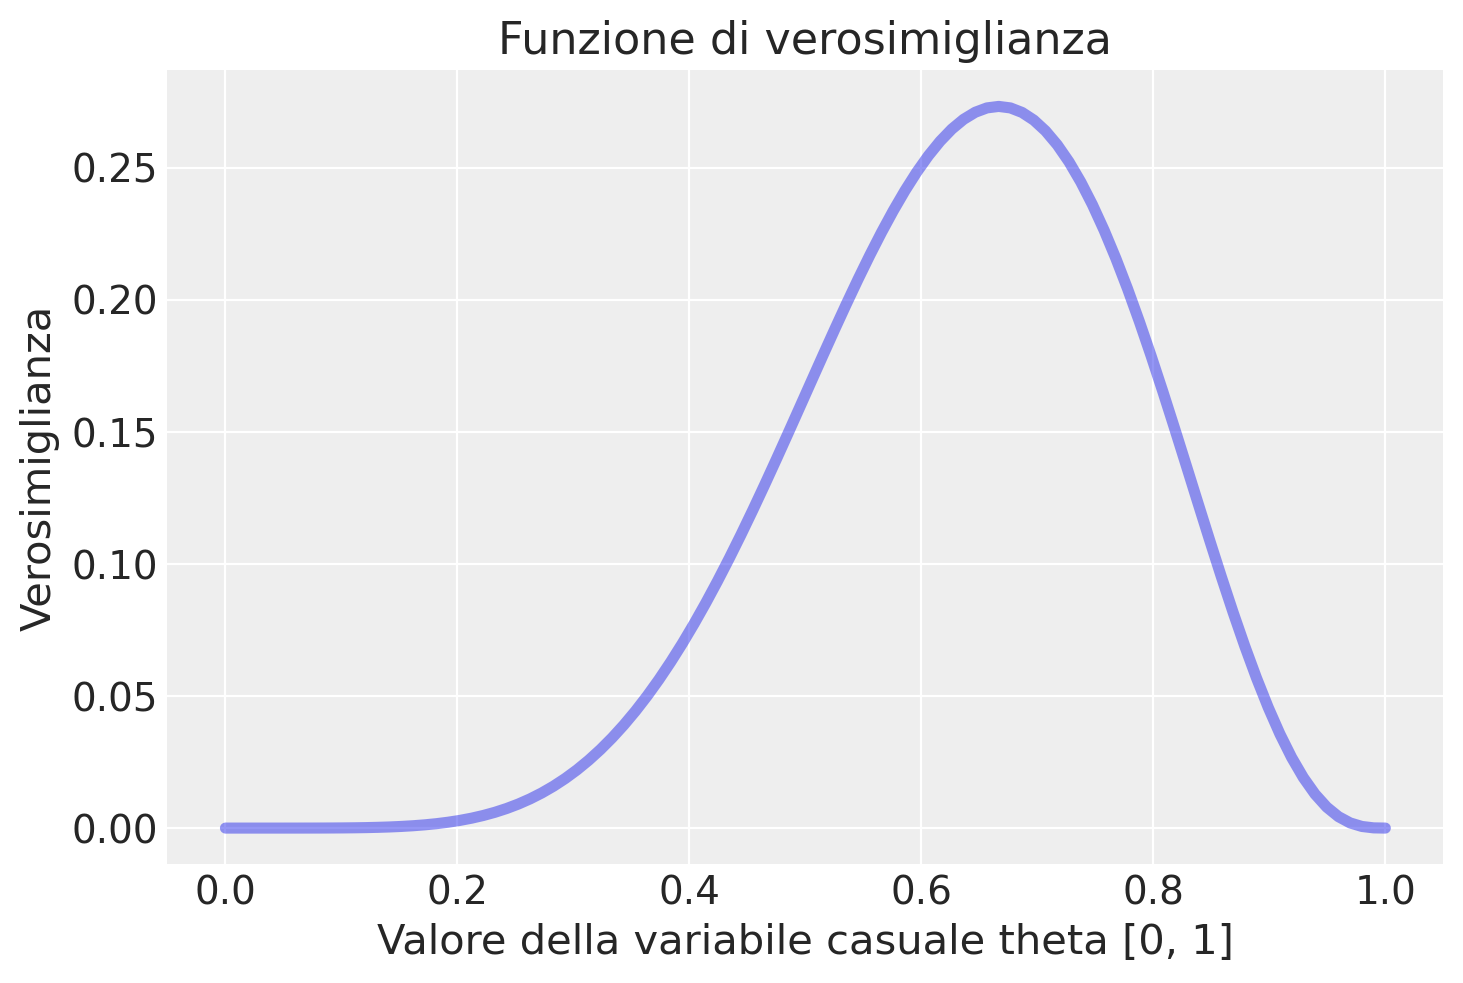

In [4]:
y = 6
n = 9
theta = np.linspace(0.0, 1.0, num=100)

like = stats.binom.pmf(y, n, theta)

plt.plot(theta, like, "-", linewidth=4, alpha=.5)
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
_ = plt.ylabel("Verosimiglianza")

Questo esempio illustra come la funzione di probabilità a posteriori si modifichi progressivamente con l'acquisizione di nuove evidenze. Tale processo avviene in maniera automatica, riflettendo il meccanismo di aggiornamento delle credenze che caratterizza l'inferenza bayesiana. In ogni pannello, la transizione dalla linea tratteggiata alla linea piena simboleggia questo aggiornamento: la linea tratteggiata rappresenta la distribuzione di probabilità a priori, ovvero le nostre credenze iniziali prima dell'osservazione dei nuovi dati; la linea piena, invece, rappresenta la distribuzione di probabilità a posteriori, che integra le nuove evidenze ai preconcetti iniziali. Quest'ultima rispecchia dunque una sintesi ottimizzata delle informazioni pregresse e attuali, offrendo una rappresentazione aggiornata e più accurata della realtà in esame.

### Il flusso di lavoro bayesiano

Metaforicamente descritto come "girare la manovella bayesiana", il flusso di lavoro bayesiano è composto da diverse fasi.

1. **Studio di Simulazione**: Questa fase prevede la generazione di dati sintetici che riproducono il contesto di ricerca. Questo aiuta a valutare la robustezza del disegno sperimentale e ad assicurare che il modello sia adeguato.
2. **Raccolta e Identificazione dei Dati**: Qui si acquisiscono e analizzano i dati reali, assicurandosi che siano appropriati per le analisi successive.
3. **Selezione del Modello Statistico**: In questa fase si formula un modello statistico che rappresenta le teorie e le ipotesi alla base della ricerca, basandosi su una solida comprensione del fenomeno e su principi statistici.
4. **Definizione delle Distribuzioni a Priori**: Si stabiliscono le distribuzioni a priori dei parametri del modello, basandosi su conoscenze pregresse e un ragionamento teorico robusto.
5. **Calcolo delle Distribuzioni a Posteriori**: Utilizzando metodi analitici o tecniche di campionamento come le Catene di Markov Monte Carlo (MCMC), si derivano le distribuzioni a posteriori dei parametri.
6. **Risoluzione dei Problemi e Diagnostica**: In questa fase si eseguono controlli per assicurare la convergenza del modello e la validità delle inferenze, utilizzando metriche e diagnosi specializzate.
7. **Controlli di Coerenza**: Oltre alla diagnostica tecnica, si valuta la coerenza e la plausibilità del modello rispetto ai dati e al contesto teorico, incluso un esame predittivo a posteriori.
8. **Interpretazione e Comunicazione dei Risultati**: Infine, i risultati vengono interpretati nel contesto della teoria sottostante e comunicati in modo chiaro, integrandoli nell'ambito più ampio della comprensione del fenomeno in studio.

Questo processo iterativo mira a ottenere inferenze valide, fornendo una base solida per la ricerca scientifica. Una rappresentazione visiva di questo flusso di lavoro bayesiano è illustrata nella figura tratta dall'articolo di @baribault2023troubleshooting.

::: {#fig-like-se}
![](../../figures/bayesian_workflow.png){width="80%"}

Una rappresentazione abbreviata del flusso di lavoro bayesiano. L'output del modello che non supera il filtro (che rappresenta i necessari controlli computazionali e di coerenza) deve essere respinto. È necessario migliorare la specifica del modello in modo che l'output possa  superare tutti i controlli. Solo allora il modello bayesiano può essere utilizzato come base per l'inferenza. (Figura tratta da @baribault2023troubleshooting).
:::

## Notazione

La costruzione di modelli statistici bayesiani che incorporano questo approccio probabilistico per caratterizzare l'incertezza richiede innanzitutto una familiarizzazione con il linguaggio e le notazioni matematiche utilizzate nella formulazione di questi modelli. Questa conoscenza facilita la comunicazione delle caratteristiche del modello e l'estensione del linguaggio di modellazione a vari domini.

Nel seguito utilizzeremo $y$ per rappresentare i dati osservati e $\theta$ per indicare i parametri sconosciuti di un modello statistico. Entrambi, $y$ e $\theta$, saranno trattati come variabili casuali. Utilizzeremo invece $x$ per denotare le quantità note, come ad esempio i predittori di un modello lineare.

Al fine di rappresentare in modo più conciso i modelli probabilistici, adotteremo una notazione specifica. Ad esempio, anziché scrivere la distribuzione di probabilità di $\theta$ come $p(\theta) = Beta(1, 1)$, scriveremo semplicemente $\theta \sim Beta(1, 1)$. Il simbolo "$\sim$" viene comunemente letto come "segue la distribuzione di". Possiamo anche interpretarlo nel senso che $\theta$ è un campione casuale estratto dalla distribuzione Beta(1, 1). Analogamente, la verosimiglianza di un modello binomiale sarà espressa come $y \sim \text{Bin}(n, \theta)$, dove "$\sim$" indica che $y$ segue una distribuzione binomiale con parametri $n$ e $\theta$. Questa notazione semplifica la rappresentazione dei modelli probabilistici, rendendo più chiara la relazione tra i dati, i parametri e le distribuzioni di probabilità coinvolte nelle analisi statistiche.

## Metodi di Stima della Distribuzione a Posteriori

La formulazione completa della distribuzione posteriore è data da:

$$
p(\theta \mid y) = \frac{p(y \mid \theta) \cdot p(\theta)}{\int_{\Theta} p(y \mid \theta) \cdot p(\theta) \, d\theta}, \quad \text{dove} \quad \theta \in \Theta,
$$

in cui $\Theta$ denota l'insieme di tutti i possibili valori del parametro $\theta$.

Il calcolo di $p(\theta \mid y)$ richiede la normalizzazione del prodotto tra la funzione di verosimiglianza $p(y \mid \theta)$ e la distribuzione a priori $p(\theta)$ attraverso una costante di normalizzazione. Questa costante, nota come *verosimiglianza marginale*, assicura che l'integrale di $p(\theta \mid y)$ su tutto lo spazio dei parametri $\Theta$ sia pari a uno.

In questa sezione, approfondiremo il concetto di likelihood marginale (che significa semplicemente la verosimiglianza media) attraverso il processo noto come *integrazione di un parametro*. Tale processo consente il calcolo della likelihood marginale, rimuovendo effettivamente il parametro incognito dalla distribuzione in esame. Per illustrare questo concetto, utilizzeremo la distribuzione binomiale, ma è importante sottolineare che l'applicabilità di questa tecnica si estende ben oltre, coprendo una vasta gamma di distribuzioni. 

Consideriamo una variabile casuale binomiale $Y$ caratterizzata da una funzione di massa di probabilità (PMF) $p(Y)$, definita in relazione a un parametro $\theta$. Supponiamo che quest'ultimo può assumere uno di tre valori specifici: 0.1, 0.5, o 0.9, ognuno dei quali ha identica probabilità di verificarsi, ossia $\frac{1}{3}$.

Fissiamo i dati a $n = 10$ prove e $k = 7$ successi, ottenendo la seguente funzione di likelihood:

$$
p(k = 7, n = 10 | \theta) = \binom{10}{7} \theta^7 (1 - \theta)^3.
$$

Per calcolare la *likelihood marginale*, denotata con $p(k = 7, n = 10)$, "marginalizziamo" il parametro $\theta$. Questo si realizza valutando la likelihood per ciascun valore possibile di $\theta$, moltiplicandola per la probabilità/densità di quel particolare valore di $\theta$ e sommando i risultati ottenuti.

Dati i valori di $\theta$, $\theta_1 = 0.1$, $\theta_2 = 0.5$, e $\theta_3 = 0.9$, ciascuno con una probabilità di $\frac{1}{3}$, calcoliamo la likelihood marginale nel seguente modo:

$$
p(k = 7, n = 10) = \sum_{i=1}^{3} p(k = 7, n = 10 | \theta_i) \cdot p(\theta_i).
$$

Sostituendo i valori di $\theta$ e la loro probabilità di $\frac{1}{3}$, otteniamo:

$$
p(k = 7, n = 10) = \frac{1}{3} \binom{10}{7} 0.1^7 (1 - 0.1)^3 + \frac{1}{3} \binom{10}{7} 0.5^7 (1 - 0.5)^3 + \frac{1}{3} \binom{10}{7} 0.9^7 (1 - 0.9)^3.
$$

Questa espressione ci consente di calcolare la likelihood marginale, basandoci sui valori discreti di $\theta$. Tale processo evidenzia come la marginalizzazione faccia emergere una comprensione globale della likelihood, incorporando tutte le possibili variazioni del parametro $\theta$ per ottenere una misura complessiva che tenga conto dell'incertezza su $\theta$.

In questo esempio abbiamo mostrato come sia possibile applicare la marginalizzazine (ovvero, l'integrazione di un parametro) non solo in contesti continui, tramite l'uso dell'integrale, ma anche in scenari discreti, sommando semplicemente i valori di likelihood moltiplicati per le rispettive probabilità di occorrenza del parametro.

Per implementare un calcolo analogo in Python, possiamo definire una funzione che calcoli la likelihood per i valori discreti di $\theta$ e poi sommare i risultati. Per l'integrazione su un intervallo continuo tra 0 e 1, invece, possiamo utilizzare la libreria `scipy`.

In [5]:
# Funzione di likelihood
def likelihood(theta, k=7, n=10):
    return comb(n, k) * (theta**k) * ((1 - theta)**(n - k))

# Likelihood marginale per valori discreti di theta
theta_vals = np.array([0.1, 0.5, 0.9])
prob_theta = 1/3
marginal_likelihood_discrete = sum([likelihood(theta) * prob_theta for theta in theta_vals])

print(f"Likelihood Marginale (discreta): {marginal_likelihood_discrete}")

# Likelihood marginale su un intervallo continuo [0, 1]
marginal_likelihood_continuous, _ = quad(lambda theta: likelihood(theta), 0, 1)

print(f"Likelihood Marginale (continua): {marginal_likelihood_continuous}")

Likelihood Marginale (discreta): 0.05819729199999999
Likelihood Marginale (continua): 0.09090909090909091


Il punto da notare, tuttavia, è che il calcolo analitico della verosimiglianza marginale è fattibile solo in circostanze particolari. In generale, è necessario procedere per approssimazione numerica.

### Metodi per determinare la distribuzione a posteriori

Per determinare la distribuzione posteriore, dunque, si possono adottare due approcci principali:

1. **Approccio Analitico**: Questa strategia si applica quando la distribuzione a priori e la funzione di verosimiglianza appartengono alla stessa famiglia di distribuzioni, dette *coniugate*. In tali circostanze, è possibile calcolare analiticamente la distribuzione posteriore. Questo metodo si distingue per la sua eleganza e efficienza computazionale, ma è limitato alle situazioni in cui esiste una coniugazione tra le distribuzioni a priori e le funzioni di verosimiglianza.
2. **Approccio Numerico**: Quando l'approccio analitico non è applicabile, ad esempio a causa dell'assenza di coniugazione tra distribuzioni a priori e funzioni di verosimiglianza, l'integrale al denominatore (la likelihood marginale) della regola di Bayes non può essere risolto con metodi analitici. In questi casi, l'inferenza bayesiana procede attraverso tecniche di approssimazione numerica. Tecniche come le catene di Markov Monte Carlo (MCMC) vengono impiegate per stimare numericamente la distribuzione posteriore. Questo metodo è più versatile e adattabile a un'ampia gamma di problemi, ma richiede un maggiore impegno computazionale e può essere più oneroso in termini di tempo rispetto all'approccio analitico.

### Linguaggi di programmazione probabilistici

L'approccio moderno alla statistica bayesiana si avvale ampiamente di tecniche di approssimazione numerica per stimare le distribuzioni posteriori. In questo contesto, si fa largo uso di linguaggi di programmazione probabilistica, noti come "Probabilistic Programming Languages" (PPL), che facilitano l'implementazione computazionale dell'aggiornamento bayesiano.

Questo sviluppo ha trasformato radicalmente il modo in cui si effettuano le analisi statistiche bayesiane, democratizzando l'accesso a modelli statistici avanzati. L'introduzione di metodi computazionali ha reso la modellazione bayesiana più accessibile, riducendo le barriere di competenza matematica e computazionale precedentemente necessarie. Questi strumenti hanno inoltre ampliato le possibilità di affrontare questioni analitiche complesse, che prima sarebbero state difficili da gestire. Utilizzando i linguaggi di programmazione probabilistica, gli analisti possono formulare modelli probabilistici con maggiore chiarezza e flessibilità, facilitando l'esplorazione delle distribuzioni posteriori e l'analisi di questioni complesse con tecniche bayesiane. Questo ha aperto nuovi orizzonti nell'analisi bayesiana, permettendo di affrontare e risolvere problemi in modi precedentemente impensabili.

## Commenti e considerazioni finali 

L'approccio bayesiano rappresenta un modo distintivo di affrontare l'incertezza associata ai parametri di interesse, contrapponendosi in modo significativo alla metodologia classica. Mentre il paradigma classico tratta i parametri come valori fissi e sconosciuti, l'approccio bayesiano li considera come quantità probabilistiche, attribuendo loro una distribuzione a priori che riflette le nostre credenze e intuizioni iniziali prima dell'esperimento. Grazie all'applicazione del teorema di Bayes, queste credenze vengono progressivamente raffinate e aggiornate sulla base dei dati osservati, conducendo alla definizione della distribuzione a posteriori. Tale distribuzione rappresenta una prospettiva aggiornata dell'incertezza, integrando sia l'evidenza empirica che le informazioni pregresse.

La potenza dell'approccio bayesiano risiede nella sua capacità di amalgamare le conoscenze pregresse con le nuove osservazioni, producendo stime dei parametri di interesse che non solo sono più accurate ma anche più significative dal punto di vista interpretativo. Oltre a essere un semplice strumento statistico, il bayesianesimo si rivela un potente strumento decisionale che favorisce un'interazione dinamica tra teoria ed esperienza.

Tuttavia, uno svantaggio dell’approccio bayesiano risiede nella sua potenziale lentezza e inefficienza nel trattare dataset molto estesi. Ciò significa che quando si applicano metodi basati sulla teoria bayesiana all’analisi dei dati, potrebbero sorgere problemi di scalabilità e di efficienza computazionale, specialmente di fronte a insiemi di dati di dimensioni considerevoli. Per superare questa difficoltà, è in sviluppo la *variational inference*, un insieme di metodi approssimativi per calcolare la distribuzione a posteriori. Questi metodi, a differenza del campionamento MCMC, producono risultati in tempi significativamente ridotti.